In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压

result1 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [3]:
std = np.std(result1)
ave = np.nanmean(result1)
final65for150 = (result1 - ave)/std

In [4]:
# 65 大气压

result1 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [5]:
std = np.std(result1)
ave = np.nanmean(result1)
final65for500 = (result1 - ave)/std

In [6]:
result1 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [7]:
std = np.std(result1)
ave = np.nanmean(result1)
final65for338 = (result1 - ave)/std

In [8]:
final65for150.shape

(3720,)

In [9]:
130*12

1560

In [10]:
dd = final65for150[1560:]

In [11]:
b22 = final65for500[:1944]

In [12]:
xx1 = np.hstack((dd,final65for338))
xx2 = np.hstack((xx1,b22))

In [13]:
d4 = xx2.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

In [14]:
ww2 = np.convolve(dmean, np.ones((5,))/5, mode='valid')
mean = np.mean(ww2)

In [15]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

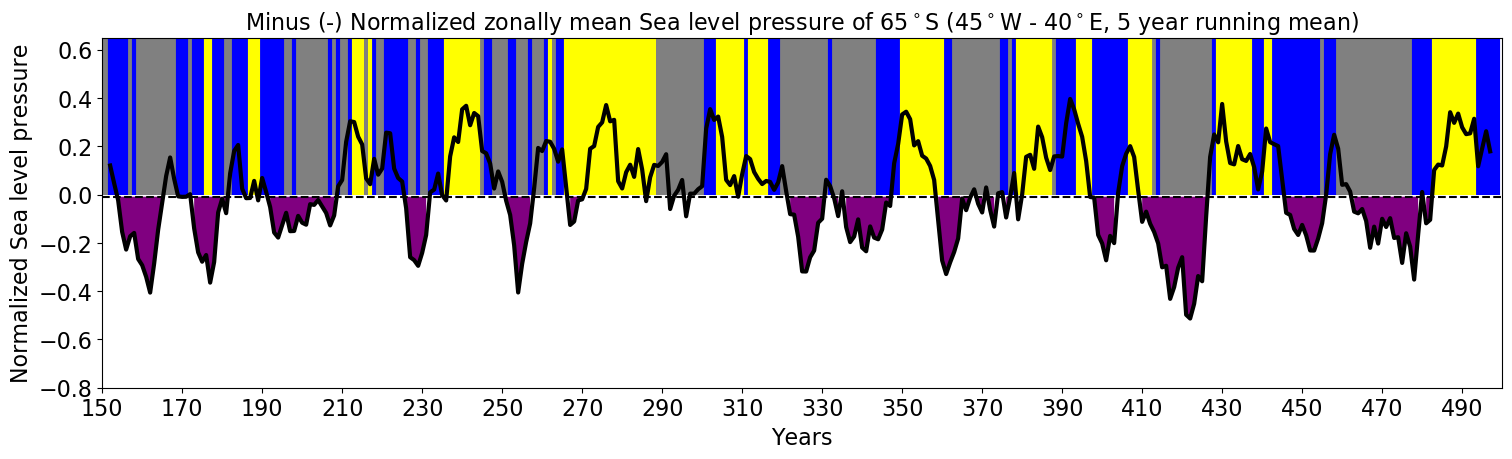

In [17]:
t = np.arange(2,348,1)
#t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-ww2,'black',linewidth=3)
plt.hlines(mean, 0, 350, colors = "black",linestyles = "dashed")
ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='purple', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 0, 0.65, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 0, 0.65, colors = "blue",linewidth=3)
plt.vlines(wspxx, 0, 0.65, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Normalized Sea level pressure',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.8, 0.65),xlim=(0, 350))
ax0.set_title('Minus (-) Normalized zonally mean Sea level pressure of 65$^\circ$S (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
plt.savefig("65pr.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
np.savetxt('P65.out', -ww2)